# Simulação do Processo de Rede Neural Desenrolada (Unrolled Neural Network)

Em uma rede neural recorrente (RNN), o "unrolling" refere-se à "desenrolação" da rede, onde a rede é desenrolada ao longo do tempo. Para ilustrar esse processo, vamos criar uma rede simples em PyTorch e simular esse "unrolling".

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [24]:
# Definindo uma rede neural simples com uma camada RNN
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # Inicializando o estado oculto
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])  # Pegando a saída final
        return out

In [25]:
# Dados de entrada (um batch de tamanho 1 com 3 timesteps)
input_data = torch.tensor([[[0.1], [0.2], [0.3]]], dtype=torch.float32)

In [26]:
# Inicializando a rede
model = SimpleRNN(input_size=1, hidden_size=5, output_size=1)
output = model(input_data)

In [27]:
print("Saída da rede neural:", output)

Saída da rede neural: tensor([[-0.2218]], grad_fn=<AddmmBackward0>)


# Principais Problemas com Redes Neurais Recorrentes (RNNs)

Agora, vamos discutir três problemas principais com RNNs, que você pode usar como base para criar os slides:

Slide 1: Problema de Desvanecimento de Gradiente (Vanishing Gradient)
O principal problema em RNNs clássicas é o desvanecimento de gradiente, onde o gradiente se torna extremamente pequeno ao longo do tempo durante o treinamento, dificultando a aprendizagem de dependências de longo prazo.

O desvanecimento de gradiente ocorre quando os pesos das redes recorrentes são multiplicados por números pequenos ao longo das iterações, fazendo com que as atualizações do peso se tornem quase nulas.

Slide 2: Explosão de Gradiente (Exploding Gradient)

O explosão de gradiente ocorre quando o gradiente cresce exponencialmente, resultando em valores de peso muito grandes e instabilidade no treinamento.
Isso geralmente acontece em redes profundas e em tarefas de sequência longa, onde o cálculo do gradiente em muitas camadas leva a grandes valores numéricos.

Slide 3: Dificuldade em Aprender Dependências de Longo Prazo
Redes RNN tradicionais têm dificuldade em capturar dependências de longo prazo devido à propagação do erro nas camadas ao longo de muitas iterações.
Modelos como LSTM (Long Short-Term Memory) ou GRU (Gated Recurrent Units) foram desenvolvidos para resolver esse problema, usando mecanismos de "portas" para controlar o fluxo de informações.

3. Explorando Embeddings de Palavras com Redes Neurais
Agora, vamos criar duas redes neurais simples em PyTorch para treinar embeddings de palavras em duas dimensões diferentes (2D e 4D). Vamos usar duas frases com três palavras.



## Preparação do treinamento

In [28]:
# Frases de treinamento
sentences = [['I', 'love', 'AI'], ['AI', 'is', 'amazing']]

# Dicionário de mapeamento de palavras para índices
word_to_idx = {'I': 0, 'love': 1, 'AI': 2, 'is': 3, 'amazing': 4}
vocab_size = len(word_to_idx)

In [29]:
# Dados de entrada (representação dos índices das palavras)
input_data = torch.tensor([[0, 1, 2], [2, 3, 4]])


In [30]:
# Definindo a rede neural com embeddings
class WordEmbeddingModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(WordEmbeddingModel, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)

    def forward(self, input):
        return self.embeddings(input)

In [31]:
# Modelo com embedding de dimensão 2
model_2d = WordEmbeddingModel(vocab_size, 2)
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model_2d.parameters(), lr=0.01)

In [32]:
# Treinamento (simulando com uma tarefa simples)
def train(model, data, epochs=100):
    for epoch in range(epochs):
        model.zero_grad()
        output = model(data)
        target = torch.randn_like(output)  # Simulação de alvo (target)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

In [33]:
train(model_2d, input_data)

# Obter embeddings após o treinamento
embeddings_2d = model_2d(input_data).detach().numpy()

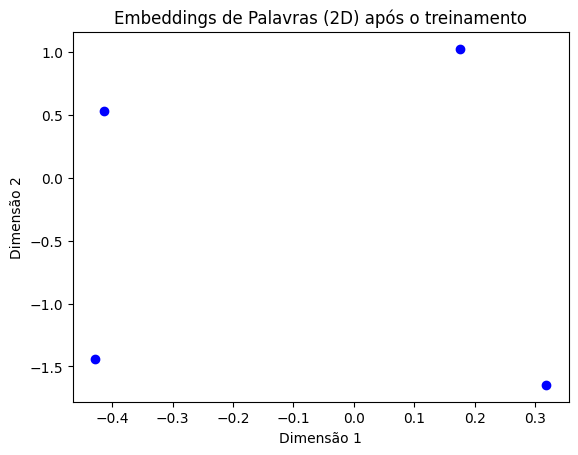

In [34]:
# Plotando os embeddings 2D antes e depois do treinamento
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], color='blue')
plt.title("Embeddings de Palavras (2D) após o treinamento")
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.show()

## Passo 2: Modelo com Embedding de 4D

In [35]:
# Modelo com embedding de dimensão 4
model_4d = WordEmbeddingModel(vocab_size, 4)

In [36]:
# Repetir o processo de treinamento
optimizer = torch.optim.SGD(model_4d.parameters(), lr=0.01)
train(model_4d, input_data)

In [37]:
# Obter embeddings após o treinamento
embeddings_4d = model_4d(input_data).detach().numpy()

In [38]:
# Reshape para (n_samples, n_features) - precisamos "achatar" a dimensão das palavras
# Aqui, vamos juntar os embeddings de todas as palavras das frases
n_samples = embeddings_4d.shape[0]  # Número de frases
n_words = embeddings_4d.shape[1]    # Número de palavras por frase
embedding_dim = embeddings_4d.shape[2]  # Dimensão do embedding (4D)

# "Achatar" a matriz para PCA, transformando em (n_samples * n_words, embedding_dim)
embeddings_4d_flat = embeddings_4d.reshape(-1, embedding_dim)

In [39]:
# Plotando os embeddings 4D (reduzindo para 2D para visualização)
from sklearn.decomposition import PCA

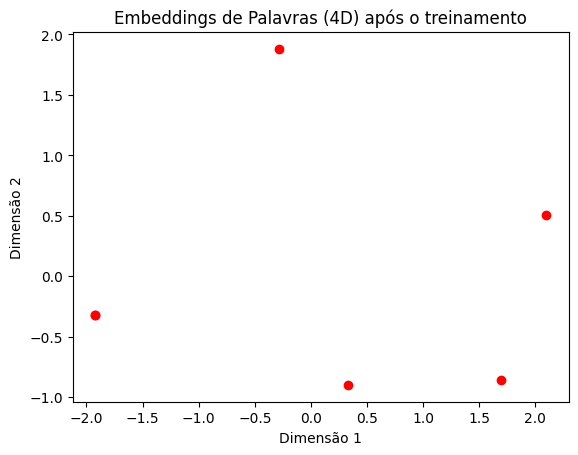

In [41]:
pca = PCA(n_components=2)
embeddings_4d_2d = pca.fit_transform(embeddings_4d_flat)

plt.scatter(embeddings_4d_2d[:, 0], embeddings_4d_2d[:, 1], color='red')
plt.title("Embeddings de Palavras (4D) após o treinamento")
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.show()